In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Beachcomber,1954
1,You Were Never Here,2017
2,Hei shou jin gang,1974
3,Campioana,1990
4,Doroppu,2009


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

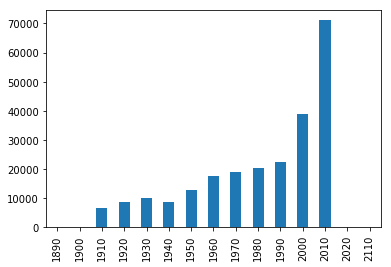

In [22]:
(titles.year //10 * 10).value_counts().sort_index().plot(kind='bar')

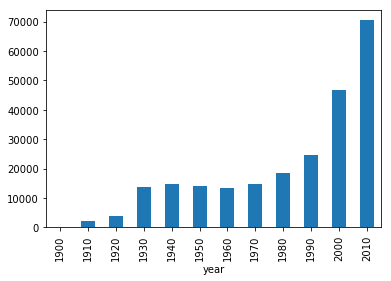

In [23]:
titles.groupby(cast.year //10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

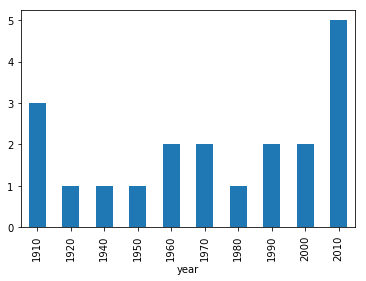

In [31]:
hamletMovies = titles[titles.title == "Hamlet"]
hamletMovies.groupby(hamletMovies.year //10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [38]:
cast[(cast.n == 1) & (cast.year //10 * 10 == 1950)].groupby(cast.type).size()

type
actor      6664
actress    2991
dtype: int64

In [41]:
cast[(cast.n == 1) & (cast.year //10 * 10 == 1950)].type.value_counts()

actor      6664
actress    2991
Name: type, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [43]:
cast[(cast.year //10 * 10 == 1950) & (cast.n <=5)].groupby(['type', 'n']).size()

type     n  
actor    1.0    6664
         2.0    4599
         3.0    5620
         4.0    5633
         5.0    5647
actress  1.0    2991
         2.0    4588
         3.0    3178
         4.0    2862
         5.0    2559
dtype: int64

In [48]:
cast[(cast.year //10 * 10 == 1950) & (cast.n == 5)].type.value_counts()

actor      5647
actress    2559
Name: type, dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [61]:
cast[(cast.title.str.contains("Pink")) & (cast.title.str.contains("Panther"))].groupby('title').size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        65
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [101]:
ozFilms = cast[cast.name == 'Frank Oz'].sort_values('year')
s = ozFilms.groupby(['year', 'title']).size() #s is a pandas series
s[s > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [110]:
ozFilms = cast[cast.name == 'Frank Oz']
s = ozFilms.groupby(['character']).size()
s[s > 1]

character
Animal            6
Bert              3
Cookie Monster    4
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64